 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_file_path = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_file_path = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().count()


Algo 1    1241
Algo 2    1241
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().count()

Algo 1    1235
Algo 2    1235
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
snp_returns_file_path = Path("./Resources/sp500_history.csv")
snp_returns = pd.read_csv(snp_returns_file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
snp_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
snp_returns.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
snp_returns["Close"] = snp_returns["Close"].str.replace("$","")
snp_returns["Close"] = snp_returns["Close"].astype("float")
snp_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [11]:
# Calculate Daily Returns
snp_daily_returns = snp_returns.pct_change()
snp_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
snp_daily_returns.dropna(inplace=True)

In [13]:
snp_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [14]:
# Rename `Close` Column to be specific to this portfolio.
snp_daily_returns.rename(columns={'Close':'snp_daily_returns'}, inplace=True)
snp_daily_returns.head()

,snp_daily_returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([whale_returns, algo_returns, snp_daily_returns], axis='columns', join='inner')
all_portfolios.head(100)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,snp_daily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2015-07-17,-0.001662,-0.003665,0.001108,0.008452,-0.009170,-0.001352,-0.000771
2015-07-20,-0.008217,-0.003349,0.001345,-0.004670,-0.013243,-0.006228,0.004280
2015-07-21,0.000868,0.000731,-0.006046,-0.001678,0.000069,-0.004192,0.002393


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

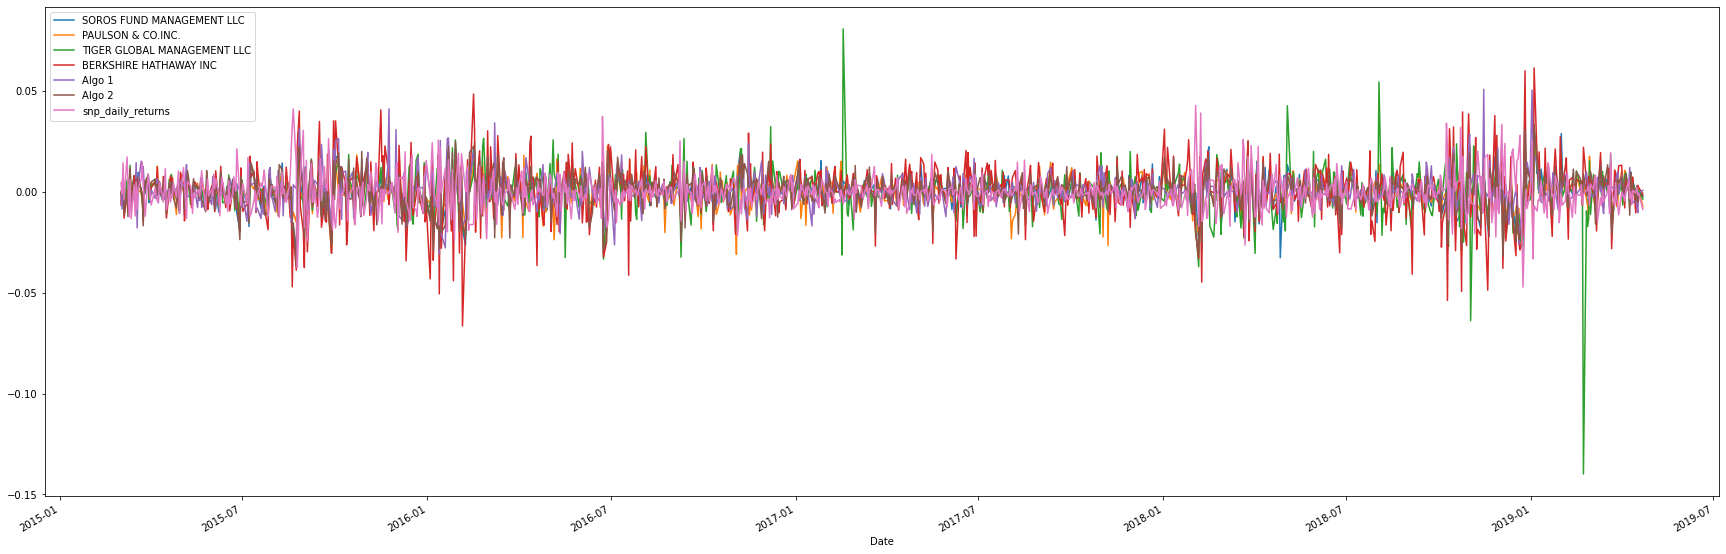

In [16]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(30,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

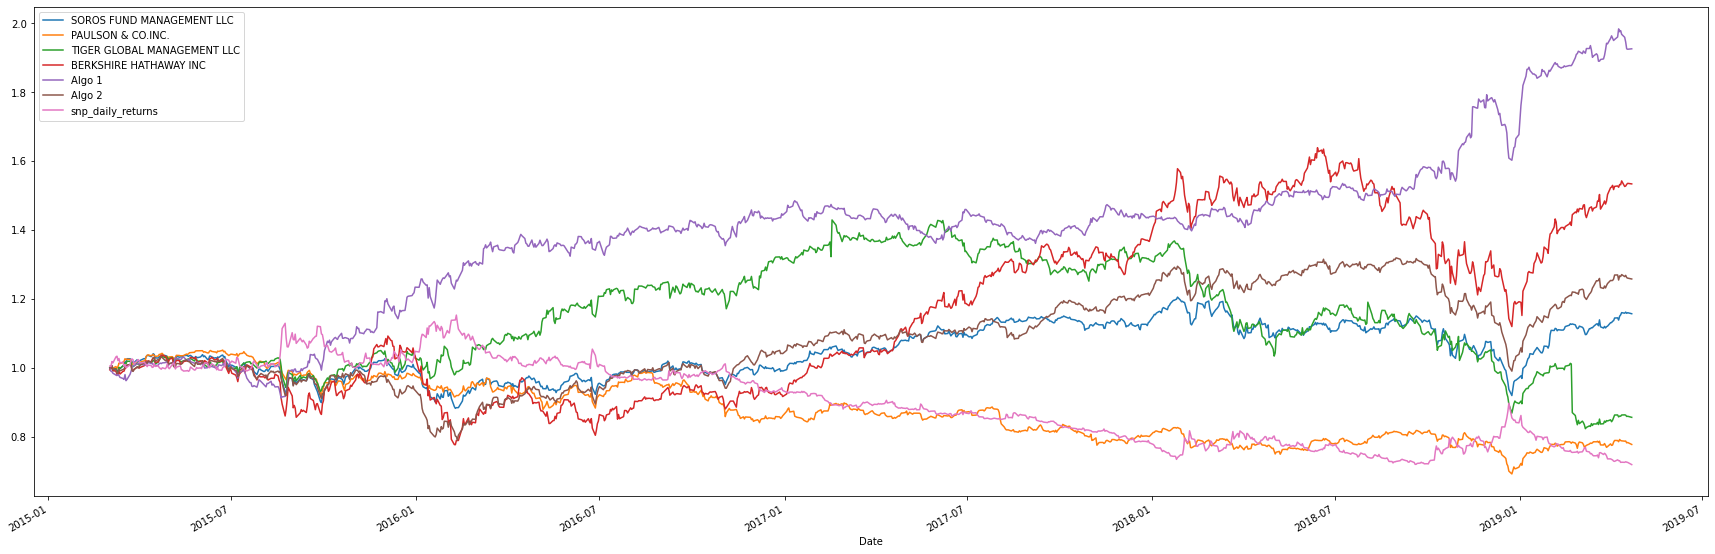

In [17]:
# Calculate cumulative returns of all portfolios
all_portfolio_cumilative = (1 + all_portfolios).cumprod()
# Plot cumulative returns
all_portfolio_cumilative.plot(figsize=(30,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns'}>

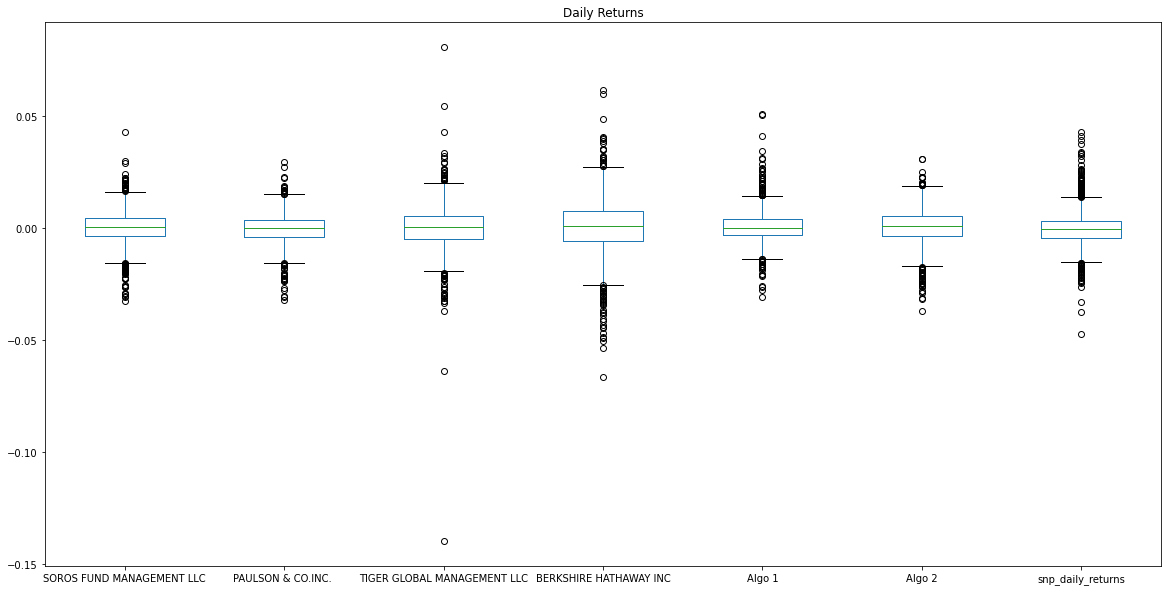

In [18]:
# Box plot to visually show risk
all_portfolios.plot(kind='box', title='Daily Returns', figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
all_portfolios_daily_sd = all_portfolios.std()
all_portfolios_daily_sd = all_portfolios_daily_sd.sort_values(ascending=False)
all_portfolios_daily_sd

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
snp_daily_returns              0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
all_portfolios_daily_sd["snp_daily_returns"]

0.00858688974707399

`BERKSHIRE HATHAWAY INC` & `TIGER GLOBAL MANAGEMENT LLC` are riskier than `S&P 500`

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
all_portfolios_annualized_std = all_portfolios_daily_sd * np.sqrt(252)
all_portfolios_annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
snp_daily_returns              0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

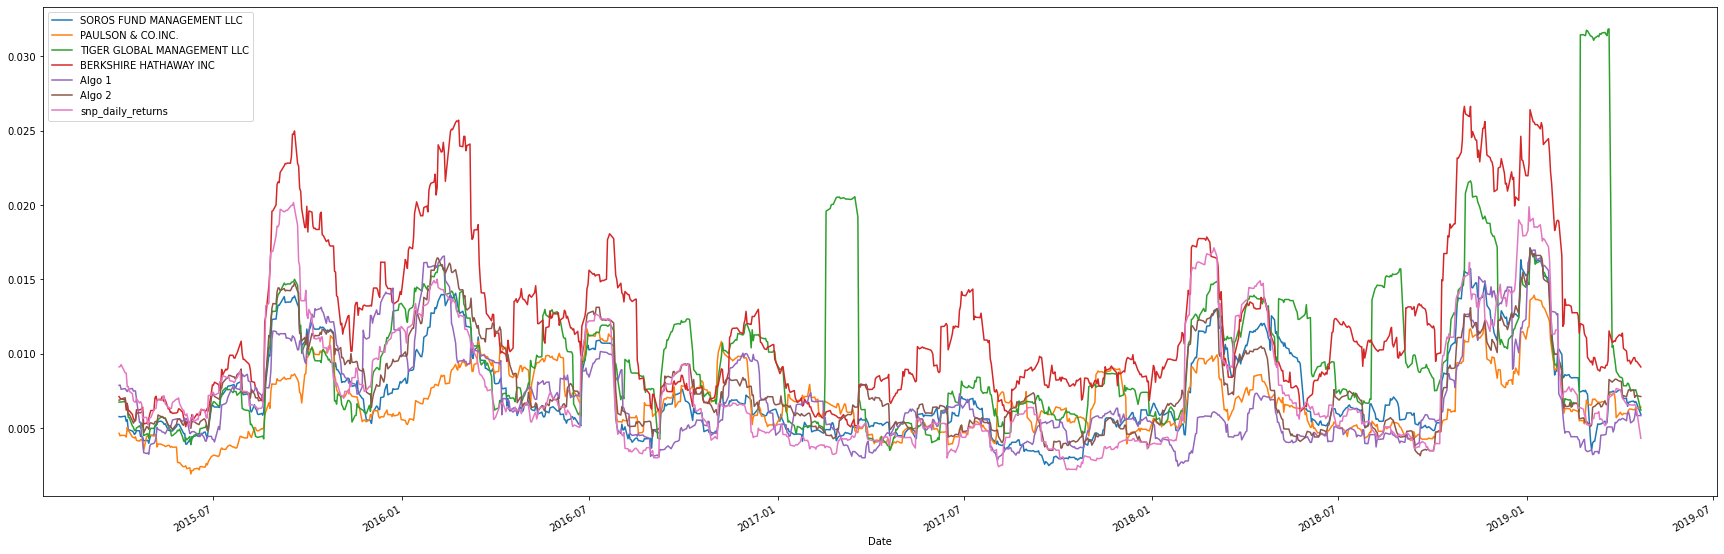

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_rolling_std = all_portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
all_portfolios_rolling_std.plot(figsize=(30,10))

### Calculate and plot the correlation

<AxesSubplot:>

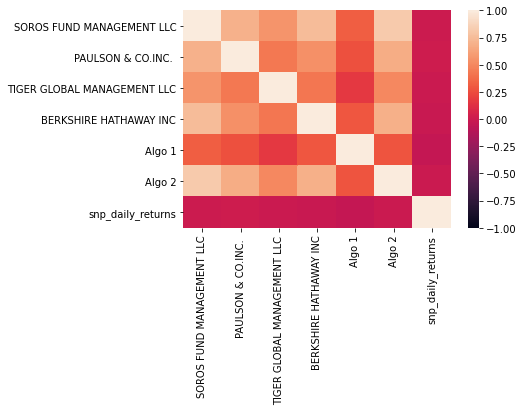

In [23]:
# Calculate the correlation
all_portfolios_corr = all_portfolios.corr()
# Display de correlation matrix
sns.heatmap(all_portfolios_corr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

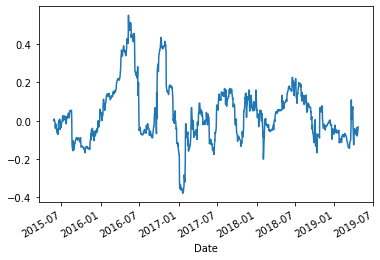

In [24]:
# Calculate covariance of a single portfolio
paulson_covariance = all_portfolios['PAULSON & CO.INC. '].rolling(window=60).cov(all_portfolios['snp_daily_returns'].rolling(window=60))
# Calculate variance of S&P 500
snp_variance = all_portfolios['snp_daily_returns'].rolling(window=60).var()
# Computing beta
paulson_beta_rolling = paulson_covariance / snp_variance
# Plot beta trend
paulson_beta_rolling.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

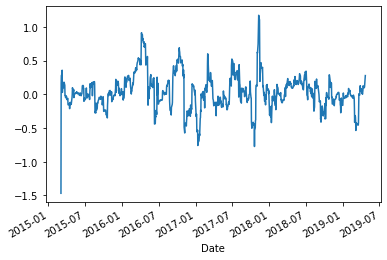

In [25]:
# Use `ewm` to calculate the rolling window
paulson_covariance_ewm = all_portfolios['PAULSON & CO.INC. '].ewm(span=21).cov(all_portfolios['snp_daily_returns'].ewm(span=21))
#Calculate variance of S&P 500
snp_variance_ewm = all_portfolios['snp_daily_returns'].ewm(span=21).var()
# Computing beta
paulson_beta_ewm = paulson_covariance_ewm / snp_variance_ewm
# Plot beta trend
paulson_beta_ewm.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
annualized_sharp_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
annualized_sharp_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
snp_daily_returns             -0.518582
dtype: float64

<AxesSubplot:>

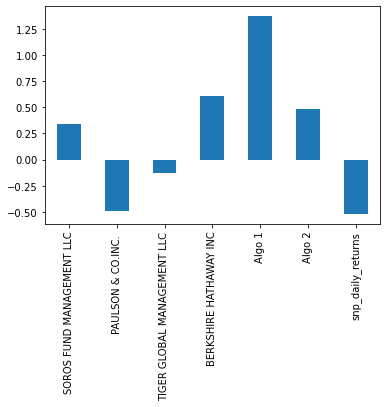

In [27]:
# Visualize the sharpe ratios as a bar plot
annualized_sharp_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed both markets and whales portfolios. Algo 2 outperformed markets and all the whales except Berkshire hathway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
goog_csvpath = Path('./Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_csvpath)
goog_df.rename(columns={'Trade DATE': 'Date', 'NOCP': 'GOOG'}, inplace=True)
goog_df['Date'] = pd.to_datetime(goog_df['Date'])
goog_df.set_index(goog_df['Date'], inplace=True)
goog_df.drop(columns=['Symbol','Date'], inplace=True)
goog_df.head()

,GOOG
Date,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [29]:
# Reading data from 2nd stock
aapl_csvpath = Path('./Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_csvpath)
aapl_df.rename(columns={'Trade DATE': 'Date', 'NOCP': 'AAPL'}, inplace=True)
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.set_index(aapl_df['Date'], inplace=True)
aapl_df.drop(columns=['Symbol','Date'], inplace=True)
aapl_df.head()

,AAPL
Date,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [30]:
# Reading data from 3rd stock
cost_csvpath = Path('./Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_csvpath)
cost_df.rename(columns={'Trade DATE': 'Date', 'NOCP': 'COST'}, inplace=True)
cost_df['Date'] = pd.to_datetime(cost_df['Date'])
cost_df.set_index(cost_df['Date'], inplace=True)
cost_df.drop(columns=['Symbol','Date'], inplace=True)
cost_df.head()

,COST
Date,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [31]:
# Combine all stocks in a single DataFrame
stocks_combined_df = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
stocks_combined_df.head()

,GOOG,AAPL,COST
Date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [32]:
# Reset Date index
stocks_combined_df.head()

,GOOG,AAPL,COST
Date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [33]:
# Reorganize portfolio data by having a column per symbol
stocks_combined_df.head()

,GOOG,AAPL,COST
Date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [34]:
# Calculate daily returns
stocks_daily_returns = stocks_combined_df.pct_change()
# Drop NAs
stocks_daily_returns.dropna(inplace=True)
# Display sample data
stocks_daily_returns.head()

,GOOG,AAPL,COST
Date,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stock_portfolio_returns = stocks_daily_returns.dot(weights)
# Display sample data
stock_portfolio_returns

Date
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios['my_portfolio_returns'] = stock_portfolio_returns
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,snp_daily_returns,my_portfolio_returns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.dropna(inplace=True)
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,snp_daily_returns,my_portfolio_returns
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
combined_portfolios_daily_sd = all_portfolios.std()
combined_portfolios_annualized_sd = combined_portfolios_daily_sd * np.sqrt(252)
combined_portfolios_annualized_sd

SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
snp_daily_returns              0.152147
my_portfolio_returns           0.213137
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

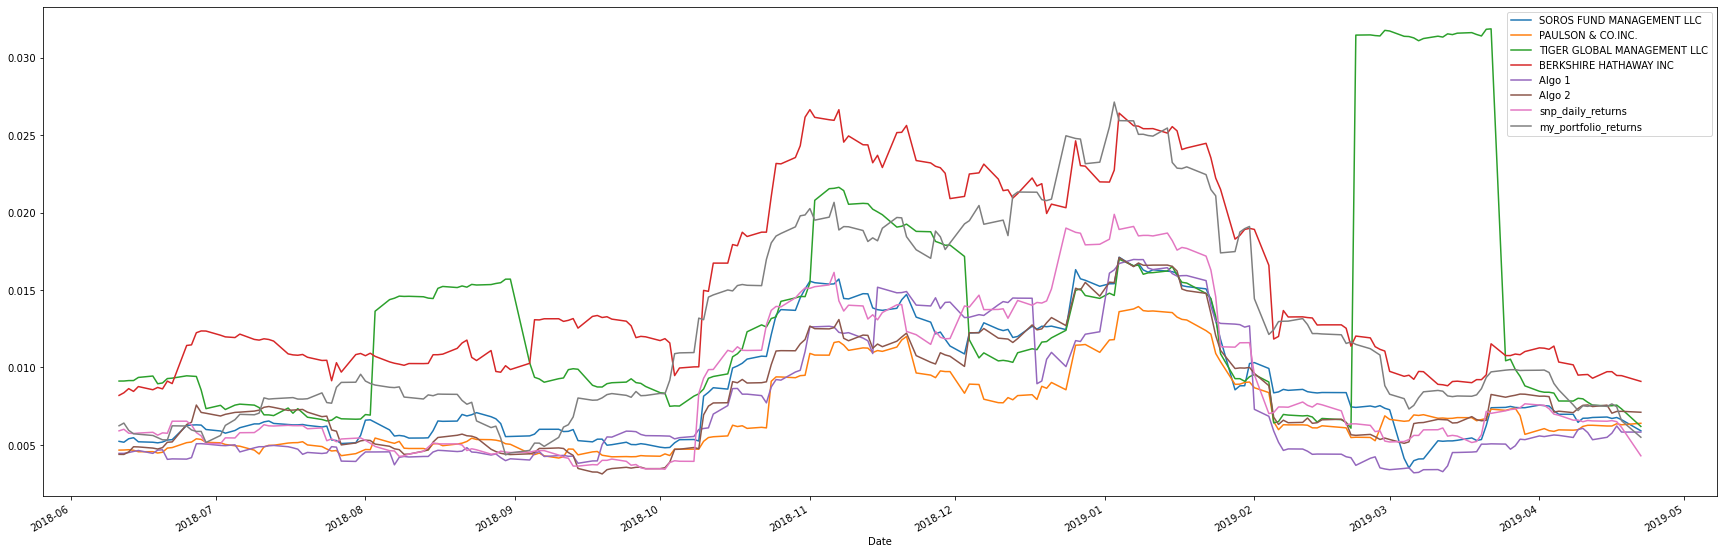

In [39]:
# Calculate rolling standard deviation
combined_portfolios_rolling_sd = all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
combined_portfolios_rolling_sd.plot(figsize=(30,10))

### Calculate and plot the correlation

<AxesSubplot:>

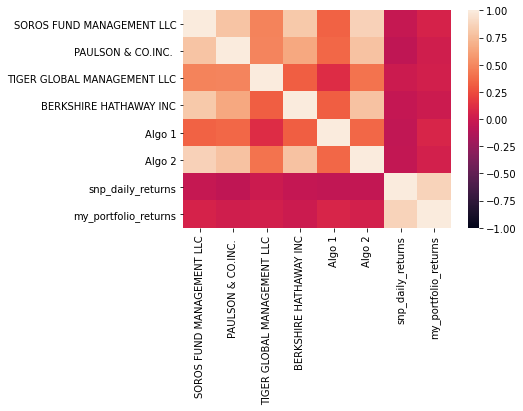

In [40]:
# Calculate and plot the correlation
combined_portfolios_corr = all_portfolios.corr()
sns.heatmap(combined_portfolios_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

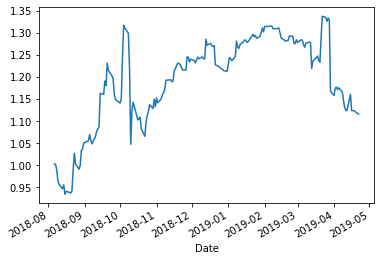

In [41]:
# Calculate and plot Beta
my_portfolio_covariance = all_portfolios['my_portfolio_returns'].rolling(window=60).cov(all_portfolios['snp_daily_returns'])
snp_variance = all_portfolios['snp_daily_returns'].rolling(window=60).var()
my_portfolio_beta = my_portfolio_covariance / snp_variance

my_portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
combined_annualized_sharp_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
combined_annualized_sharp_ratios

SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
snp_daily_returns             -0.432942
my_portfolio_returns          -0.613547
dtype: float64

<AxesSubplot:>

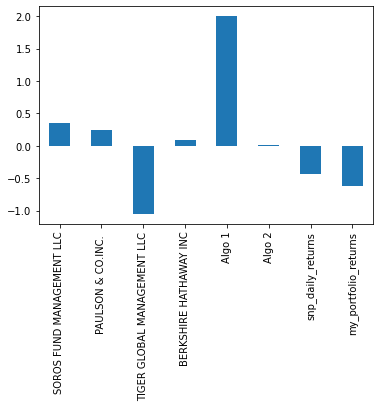

In [43]:
# Visualize the sharpe ratios as a bar plot
combined_annualized_sharp_ratios.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

My portfolio `underperformed` compared to  `Algorithms`, `S&P 500` and that of the `Whales`